In [117]:
import pandas as pd

preproc_file = "processed_data.csv"

df = pd.read_csv(preproc_file, sep=';', engine='python')

#therapy_applied = df.query("TherapyApply == 1")
#therapy_not_applied = df.query("TherapyApply == 0")


/tmp/ipykernel_8490/1936193838.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['AgeGroup', 'Outcome']).size().unstack()


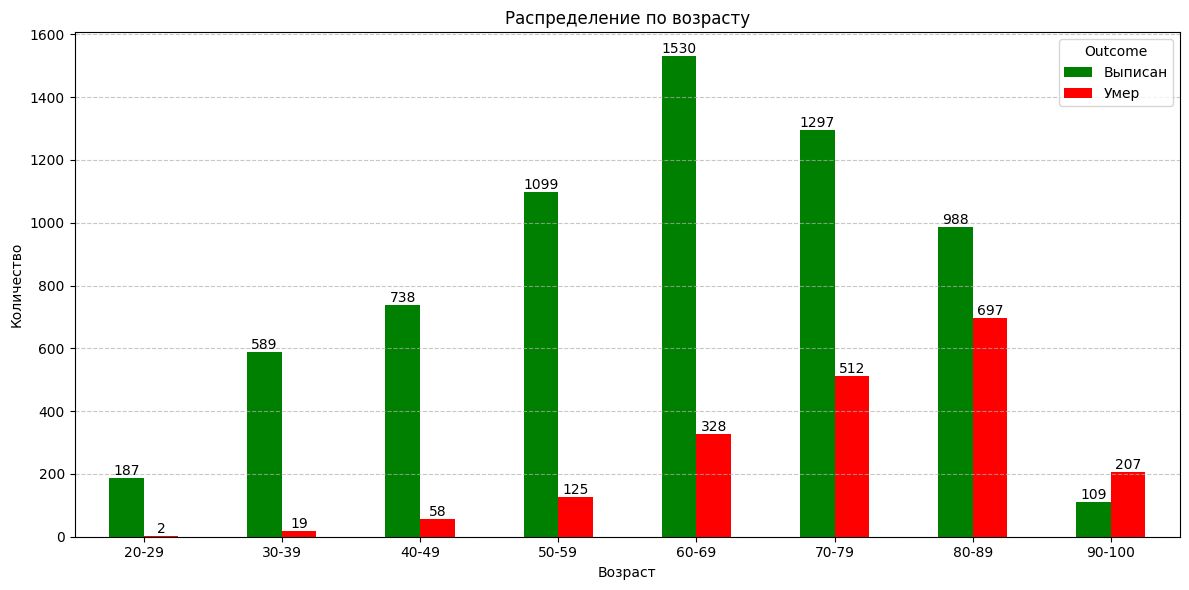

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

grouped = df.groupby(['AgeGroup', 'Outcome']).size().unstack()

ax = grouped.plot(kind='bar', stacked=False, figsize=(12, 6), color=['green', 'red'])
plt.title('Распределение по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Outcome')

for p in ax.containers:
    ax.bar_label(p, label_type='edge')

plt.tight_layout()
plt.show()


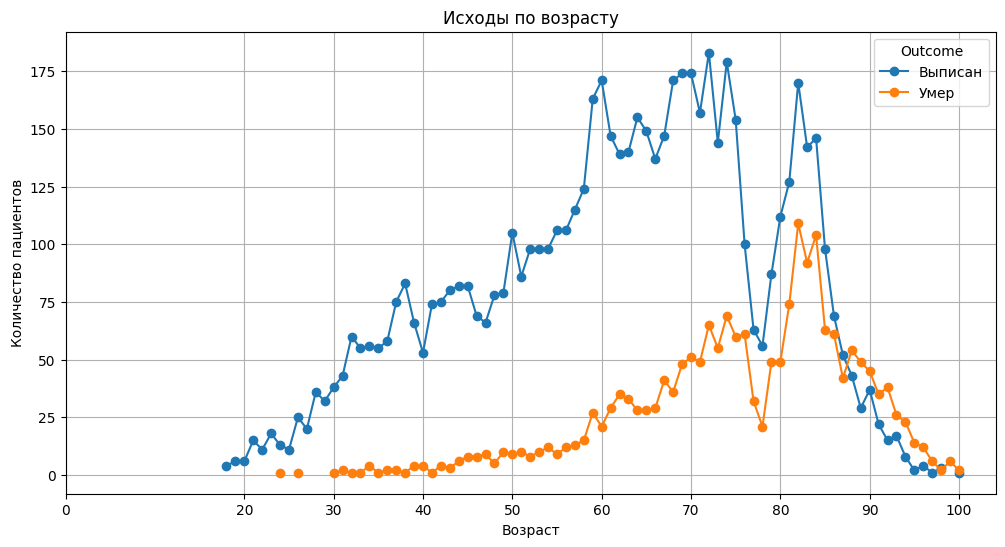

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

age_outcome = df.groupby(['Age', 'Outcome']).size().unstack()

age_outcome.plot(kind='line', marker='o', ax=plt.gca())

plt.xticks([0, 20, 30, 40, 50, 60, 70, 80, 90, 100])

plt.title('Исходы по возрасту')
plt.ylabel('Количество пациентов')
plt.xlabel('Возраст')
plt.grid(True)
plt.show()

Факт вакцинации